In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pickle

# Load dataset
df = pd.read_csv("flood_dataset_v2.csv")

# Features & Target
X = df[["Water Level", "Temperature", "Rainfall"]]
y = df["Flood Occurred"]

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 95.00%


In [ ]:
from sklearn.metrics import roc_auc_score
# Make predictions

y_pred_proba = model.predict_proba(X_test)[:, 1] # Probability of positive class

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

auroc = roc_auc_score(y_test, y_pred_proba)
print(f"AUROC Score: {auroc:.4f}")


Model Accuracy: 95.00%
AUROC Score: 0.9334


In [ ]:
# prompt: find the F1 score

from sklearn.metrics import f1_score

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")


F1 Score: 0.9107


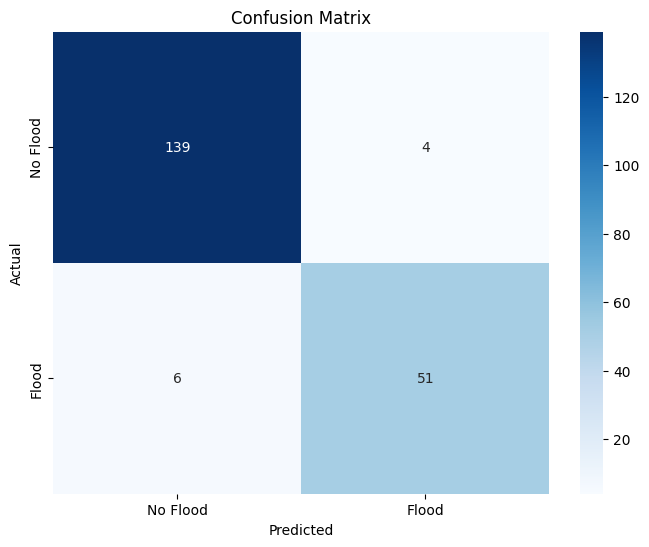

In [ ]:
# prompt: make the confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are already defined from your previous code

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Flood", "Flood"], yticklabels=["No Flood", "Flood"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# Custom input values (replace with your own values)
custom_input = {
    "Water Level": [300.5],  # Replace with your custom value
    "Temperature": [32],    # Replace with your custom value
    "Rainfall": [47]       # Replace with your custom value
}

# Convert the custom input into a DataFrame
custom_input_df = pd.DataFrame(custom_input)

# Make a prediction using the trained model
custom_prediction = model.predict(custom_input_df)

# Output the prediction
if custom_prediction[0] == 1:
    print("Flood Occurred")
else:
    print("Flood did not occur")


Flood Occurred


In [ ]:
with open("flood_model.pkl", "wb") as f:
    pickle.dump(model, f)